In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import model_utils as util

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
DATA_PATH =  '../../data/cluster/year/'
os.listdir(DATA_PATH)

['weights.bestNN.hdf5',
 'X_test.csv',
 'X_train.csv',
 'X_valid.csv',
 'y_test.csv',
 'y_train.csv',
 'y_valid.csv']

In [3]:
[[X_train, y_train], 
 [X_valid, y_valid], 
 [X_test, y_test]] = util.load_data(DATA_PATH)

X_train: (529623, 24)
X_valid: (176541, 24)
X_test: (176541, 24)
y_train: (529623, 1)
y_valid: (176541, 1)
y_test: (176541, 1)


In [4]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test,  'y_test')

Percent presence in y_train: 17.26%
Percent presence in y_valid: 13.92%
Percent presence in y_test: 12.64%


In [5]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 17.26)
print('  valid:', 100 - 13.92)
print('  test: ', 100 - 12.64)

Baseline accuracy if predicting "absent" for all cells:
  train: 82.74
  valid: 86.08
  test:  87.36


In [6]:
np.isfinite(X_valid).all()

year                        True
meanTemp_Annual             True
meanTemp_AprAug             True
meanTemp_Aug                True
meanMinTemp_DecFeb          True
meanMinTemp_Oct             True
meanMinTemp_Jan             True
meanMinTemp_Mar             True
meanMaxTemp_Aug             True
precip_meanAnnual           True
precip_JunAug               True
vegetation                  True
precipPrevious_JunAug       True
precip_OctSep               True
precipPrevious_OctSep       True
precip_growingSeason        True
varPrecip_growingSeason    False
elev_etopo1                 True
lat                         True
lon                         True
studyArea                   True
elev_srtm30                 True
x                           True
y                           True
dtype: bool

In [7]:
X_train, y_train = util.drop_nans(
    X_train, y_train, 'varPrecip_growingSeason')
X_valid, y_valid = util.drop_nans(
    X_valid, y_valid, 'varPrecip_growingSeason')
X_test,  y_test  = util.drop_nans(
    X_test,  y_test,  'varPrecip_growingSeason')

(526849, 24) (526849, 1)
(176146, 24) (176146, 1)
(175416, 24) (175416, 1)


In [8]:
full_test = X_test.copy()
full_test['beetle'] = y_test['beetle']

In [9]:
# Drop 'studyArea' from predictors (all 1 in the reduced data) and 'x' and
# 'y' (perfectly correlated with 'lon' and 'lat')
X_train = X_train.drop(['studyArea', 'x', 'y', 'elev_srtm30'], axis=1)
X_valid = X_valid.drop(['studyArea', 'x', 'y', 'elev_srtm30'], axis=1)
X_test  = X_test.drop(['studyArea',  'x', 'y', 'elev_srtm30'],  axis=1)

In [10]:
# Normalize data to make gradient descent more efficient
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [11]:
y_train = y_train['beetle'].values.reshape(-1)
y_valid = y_valid['beetle'].values.reshape(-1)
y_test  = y_test['beetle'].values.reshape(-1)

# Baseline Logistic Regression 
#### With L1 (_Lasso Regression_) or L2 (_Ridge Regression_ ) Regularization
This model will be considered the baseline for logistic regression models as it uses just the raw predictors.  After some EDA, various transformations and interaction terms will also be considered in order to improve the model.

In [12]:
param_grid = [{'C': [0.001, 0.01, 0.1], 'penalty': ['l1']},
              {'C': [0.001, 0.01, 0.1], 'penalty': ['l2']}]
logistic_mod = GridSearchCV(LogisticRegression(C=1), 
                            param_grid, 
                            cv=5,
                            scoring='accuracy')
logistic_mod.fit(X_train, y_train)

print(logistic_mod.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [21]:
param_grid = [{'C': [0.0001, 0.001, 0.005], 'penalty': ['l1']},
              {'C': [0.0001, 0.001, 0.005], 'penalty': ['l2']}]
logistic_mod = GridSearchCV(LogisticRegression(C=1), 
                            param_grid, 
                            cv=5,
                            scoring='accuracy')
logistic_mod.fit(X_train, y_train)

print(logistic_mod.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [22]:
param_grid = [{'C': [0.0005, 0.001, 0.002], 'penalty': ['l1']},
              {'C': [0.0005, 0.001, 0.002], 'penalty': ['l2']}]
logistic_mod = GridSearchCV(LogisticRegression(C=1), 
                            param_grid, 
                            cv=5,
                            scoring='accuracy')
logistic_mod.fit(X_train, y_train)

print(logistic_mod.best_params_)

{'C': 0.0005, 'penalty': 'l2'}


In [23]:
param_grid = [{'C': [0.0003, 0.0005, 0.0008], 'penalty': ['l1']},
              {'C': [0.0003, 0.0005, 0.0008], 'penalty': ['l2']}]
logistic_mod = GridSearchCV(LogisticRegression(C=1), 
                            param_grid, 
                            cv=5,
                            scoring='accuracy')
logistic_mod.fit(X_train, y_train)

print(logistic_mod.best_params_)

{'C': 0.0005, 'penalty': 'l2'}


In [24]:
param_grid = [{'C': [0.0004, 0.0005, 0.0006], 'penalty': ['l1']},
              {'C': [0.0004, 0.0005, 0.0006], 'penalty': ['l2']}]
logistic_mod = GridSearchCV(LogisticRegression(C=1), 
                            param_grid, 
                            cv=5,
                            scoring='accuracy')
logistic_mod.fit(X_train, y_train)

print(logistic_mod.best_params_)

{'C': 0.0006, 'penalty': 'l2'}


In [25]:
param_grid = [{'C': [0.0006, 0.0007], 'penalty': ['l1']},
              {'C': [0.0006, 0.0007], 'penalty': ['l2']}]
logistic_mod = GridSearchCV(LogisticRegression(C=1), 
                            param_grid, 
                            cv=5,
                            scoring='accuracy')
logistic_mod.fit(X_train, y_train)

print(logistic_mod.best_params_)

{'C': 0.0006, 'penalty': 'l2'}


In [12]:
logistic_clf = LogisticRegression(C = 0.6, penalty = 'l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.81353468326720479

In [13]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[ 0.9974864   0.0025136 ]
 [ 0.99763911  0.00236089]
 [ 0.9976106   0.0023894 ]
 [ 0.99436209  0.00563791]
 [ 0.99378137  0.00621863]]


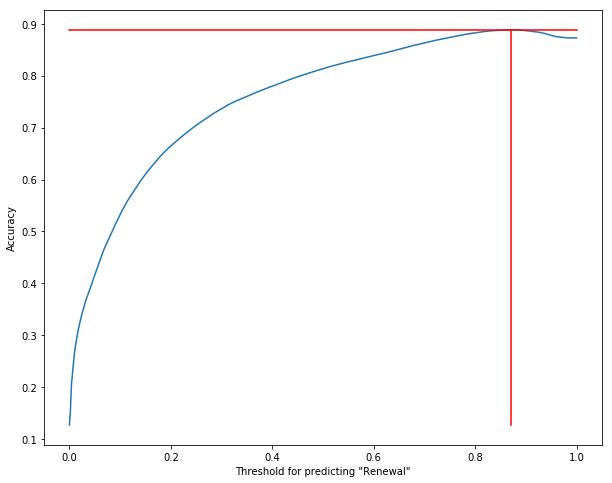

{'threshold': 0.86973947895791581, 'accuracy': 0.88865895927395444}


In [17]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [20]:
preds = logistic_clf.predict(X_test)

In [24]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	19556		2758
        0	29951		123151
Accuracy:  0.813534683267
Precision: 0.395014846385
Recall:    0.876400466075
F1:        0.544576098913


In [25]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.8697)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	7157		15157
        0	4374		148728
Accuracy:  0.888658959274
Precision: 0.620674702975
Recall:    0.320740342386
F1:        0.422928054365


In [26]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.907528419073


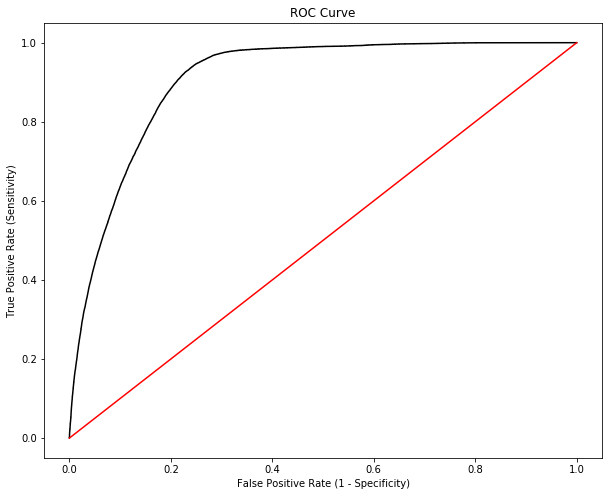

In [27]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])